# Project: Train a Quadcopter How to Fly

Design an agent to fly a quadcopter, and then train it using a reinforcement learning algorithm of your choice! 

Try to apply the techniques you have learnt, but also feel free to come up with innovative ideas and test them.

## Instructions

Take a look at the files in the directory to better understand the structure of the project. 

- `task.py`: Define your task (environment) in this file.
- `agents/`: Folder containing reinforcement learning agents.
    - `policy_search.py`: A sample agent has been provided here.
    - `agent.py`: Develop your agent here.
- `physics_sim.py`: This file contains the simulator for the quadcopter.  **DO NOT MODIFY THIS FILE**.

For this project, you will define your own task in `task.py`.  Although we have provided a example task to get you started, you are encouraged to change it.  Later in this notebook, you will learn more about how to amend this file.

You will also design a reinforcement learning agent in `agent.py` to complete your chosen task.  

You are welcome to create any additional files to help you to organize your code.  For instance, you may find it useful to define a `model.py` file defining any needed neural network architectures.

## Controlling the Quadcopter

We provide a sample agent in the code cell below to show you how to use the sim to control the quadcopter.  This agent is even simpler than the sample agent that you'll examine (in `agents/policy_search.py`) later in this notebook!

The agent controls the quadcopter by setting the revolutions per second on each of its four rotors.  The provided agent in the `Basic_Agent` class below always selects a random action for each of the four rotors.  These four speeds are returned by the `act` method as a list of four floating-point numbers.  

For this project, the agent that you will implement in `agents/agent.py` will have a far more intelligent method for selecting actions!

In [16]:
import random

class Basic_Agent():
    def __init__(self, task):
        self.task = task
    
    def act(self):
        new_thrust = random.gauss(450., 25.)
        return [new_thrust + random.gauss(0., 1.) for x in range(4)]

Run the code cell below to have the agent select actions to control the quadcopter.  

Feel free to change the provided values of `runtime`, `init_pose`, `init_velocities`, and `init_angle_velocities` below to change the starting conditions of the quadcopter.

The `labels` list below annotates statistics that are saved while running the simulation.  All of this information is saved in a text file `data.txt` and stored in the dictionary `results`.  

In [17]:
%load_ext autoreload
%autoreload 2

import csv
import numpy as np
from task import Task

# Modify the values below to give the quadcopter a different starting position.
runtime = 5.                                     # time limit of the episode
init_pose = np.array([0., 0., 10., 0., 0., 0.])  # initial pose
init_velocities = np.array([0., 0., 0.])         # initial velocities
init_angle_velocities = np.array([0., 0., 0.])   # initial angle velocities
file_output = 'data.txt'                         # file name for saved results

# Setup
task = Task(init_pose, init_velocities, init_angle_velocities, runtime)
agent = Basic_Agent(task)
done = False
labels = ['time', 'x', 'y', 'z', 'phi', 'theta', 'psi', 'x_velocity',
          'y_velocity', 'z_velocity', 'phi_velocity', 'theta_velocity',
          'psi_velocity', 'rotor_speed1', 'rotor_speed2', 'rotor_speed3', 'rotor_speed4']
results = {x : [] for x in labels}

# Run the simulation, and save the results.
with open(file_output, 'w') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(labels)
    while True:
        rotor_speeds = agent.act()
        _, _, done = task.step(rotor_speeds)
        to_write = [task.sim.time] + list(task.sim.pose) + list(task.sim.v) + list(task.sim.angular_v) + list(rotor_speeds)
        for ii in range(len(labels)):
            results[labels[ii]].append(to_write[ii])
        writer.writerow(to_write)
        if done:
            break

Run the code cell below to visualize how the position of the quadcopter evolved during the simulation.

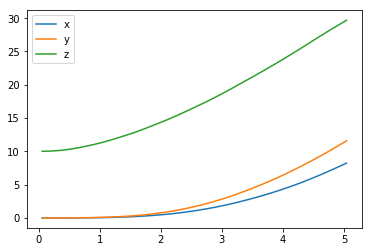

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(results['time'], results['x'], label='x')
plt.plot(results['time'], results['y'], label='y')
plt.plot(results['time'], results['z'], label='z')
plt.legend()
_ = plt.ylim()

The next code cell visualizes the velocity of the quadcopter.

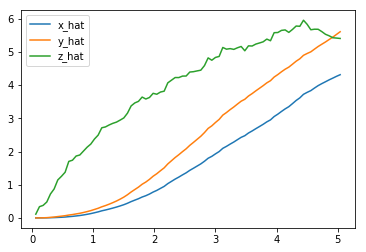

In [19]:
plt.plot(results['time'], results['x_velocity'], label='x_hat')
plt.plot(results['time'], results['y_velocity'], label='y_hat')
plt.plot(results['time'], results['z_velocity'], label='z_hat')
plt.legend()
_ = plt.ylim()

Next, you can plot the Euler angles (the rotation of the quadcopter over the $x$-, $y$-, and $z$-axes),

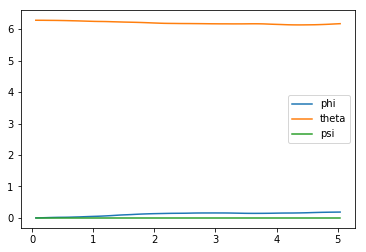

In [20]:
plt.plot(results['time'], results['phi'], label='phi')
plt.plot(results['time'], results['theta'], label='theta')
plt.plot(results['time'], results['psi'], label='psi')
plt.legend()
_ = plt.ylim()

before plotting the velocities (in radians per second) corresponding to each of the Euler angles.

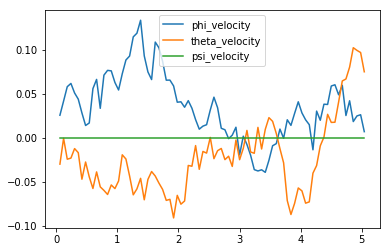

In [21]:
plt.plot(results['time'], results['phi_velocity'], label='phi_velocity')
plt.plot(results['time'], results['theta_velocity'], label='theta_velocity')
plt.plot(results['time'], results['psi_velocity'], label='psi_velocity')
plt.legend()
_ = plt.ylim()

Finally, you can use the code cell below to print the agent's choice of actions.  

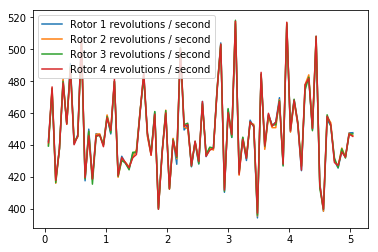

In [22]:
plt.plot(results['time'], results['rotor_speed1'], label='Rotor 1 revolutions / second')
plt.plot(results['time'], results['rotor_speed2'], label='Rotor 2 revolutions / second')
plt.plot(results['time'], results['rotor_speed3'], label='Rotor 3 revolutions / second')
plt.plot(results['time'], results['rotor_speed4'], label='Rotor 4 revolutions / second')
plt.legend()
_ = plt.ylim()

When specifying a task, you will derive the environment state from the simulator.  Run the code cell below to print the values of the following variables at the end of the simulation:
- `task.sim.pose` (the position of the quadcopter in ($x,y,z$) dimensions and the Euler angles),
- `task.sim.v` (the velocity of the quadcopter in ($x,y,z$) dimensions), and
- `task.sim.angular_v` (radians/second for each of the three Euler angles).

In [23]:
# the pose, velocity, and angular velocity of the quadcopter at the end of the episode
print(task.sim.pose)
print(task.sim.v)
print(task.sim.angular_v)

[  8.2365408   11.58388366  29.69096575   0.18580188   6.17361911   0.        ]
[ 4.31396878  5.60794233  5.40602831]
[ 0.00735245  0.07539015  0.        ]


In the sample task in `task.py`, we use the 6-dimensional pose of the quadcopter to construct the state of the environment at each timestep.  However, when amending the task for your purposes, you are welcome to expand the size of the state vector by including the velocity information.  You can use any combination of the pose, velocity, and angular velocity - feel free to tinker here, and construct the state to suit your task.

## The Task

A sample task has been provided for you in `task.py`.  Open this file in a new window now. 

The `__init__()` method is used to initialize several variables that are needed to specify the task.  
- The simulator is initialized as an instance of the `PhysicsSim` class (from `physics_sim.py`).  
- Inspired by the methodology in the original DDPG paper, we make use of action repeats.  For each timestep of the agent, we step the simulation `action_repeats` timesteps.  If you are not familiar with action repeats, please read the **Results** section in [the DDPG paper](https://arxiv.org/abs/1509.02971).
- We set the number of elements in the state vector.  For the sample task, we only work with the 6-dimensional pose information.  To set the size of the state (`state_size`), we must take action repeats into account.  
- The environment will always have a 4-dimensional action space, with one entry for each rotor (`action_size=4`). You can set the minimum (`action_low`) and maximum (`action_high`) values of each entry here.
- The sample task in this provided file is for the agent to reach a target position.  We specify that target position as a variable.

The `reset()` method resets the simulator.  The agent should call this method every time the episode ends.  You can see an example of this in the code cell below.

The `step()` method is perhaps the most important.  It accepts the agent's choice of action `rotor_speeds`, which is used to prepare the next state to pass on to the agent.  Then, the reward is computed from `get_reward()`.  The episode is considered done if the time limit has been exceeded, or the quadcopter has travelled outside of the bounds of the simulation.

In the next section, you will learn how to test the performance of an agent on this task.

## The Agent

The sample agent given in `agents/policy_search.py` uses a very simplistic linear policy to directly compute the action vector as a dot product of the state vector and a matrix of weights. Then, it randomly perturbs the parameters by adding some Gaussian noise, to produce a different policy. Based on the average reward obtained in each episode (`score`), it keeps track of the best set of parameters found so far, how the score is changing, and accordingly tweaks a scaling factor to widen or tighten the noise.

Run the code cell below to see how the agent performs on the sample task.

In [24]:
import sys
import pandas as pd
from agents.policy_search import PolicySearch_Agent
from task import Task

num_episodes = 1000
target_pos = np.array([0., 0., 10.])
task = Task(target_pos=target_pos)
agent = PolicySearch_Agent(task) 

for i_episode in range(1, num_episodes+1):
    state = agent.reset_episode() # start a new episode
    while True:
        action = agent.act(state) 
        next_state, reward, done = task.step(action)
        agent.step(reward, done)
        state = next_state
        if done:
            print("\rEpisode = {:4d}, score = {:7.3f} (best = {:7.3f}), noise_scale = {}".format(
                i_episode, agent.score, agent.best_score, agent.noise_scale), end="")  # [debug]
            break
    sys.stdout.flush()

Episode = 1000, score =  30.272 (best =  36.457), noise_scale = 3.255

This agent should perform very poorly on this task.  And that's where you come in!

## Define the Task, Design the Agent, and Train Your Agent!

Amend `task.py` to specify a task of your choosing.  If you're unsure what kind of task to specify, you may like to teach your quadcopter to takeoff, hover in place, land softly, or reach a target pose.  

After specifying your task, use the sample agent in `agents/policy_search.py` as a template to define your own agent in `agents/agent.py`.  You can borrow whatever you need from the sample agent, including ideas on how you might modularize your code (using helper methods like `act()`, `learn()`, `reset_episode()`, etc.).

Note that it is **highly unlikely** that the first agent and task that you specify will learn well.  You will likely have to tweak various hyperparameters and the reward function for your task until you arrive at reasonably good behavior.

As you develop your agent, it's important to keep an eye on how it's performing. Use the code above as inspiration to build in a mechanism to log/save the total rewards obtained in each episode to file.  If the episode rewards are gradually increasing, this is an indication that your agent is learning.

In [26]:
## TODO: Train your agent here.
import numpy as np
import sys
import pandas as pd
from agents.agent import DDPG
from task import Task
import csv

num_episodes = 500
#Take off task
init_pos = np.array([0., 0., 10., 0., 0., 0.])
target_pos = np.array([0., 0., 100.])
task = Task(init_pose=init_pos, target_pos=target_pos, runtime=5)
agent = DDPG(task)
labels = ['num_episode', 'final_reward', 'time', 'x', 'y', 'z', 'phi', 'theta', 'psi', 'x_velocity',
          'y_velocity', 'z_velocity', 'phi_velocity', 'theta_velocity',
          'psi_velocity', 'rotor_speed1', 'rotor_speed2', 'rotor_speed3', 'rotor_speed4']
results = {x: [] for x in labels}
for i_episode in range(1, num_episodes+1):
    state = agent.reset_episode() # start a new episode
    while True:
        action = agent.act(state) 
        next_state, reward, done = task.step(action)
        agent.step(action, reward, next_state, done)
        state = next_state
        if done:
            results['final_reward'].append(agent.score)
            results['num_episode'].append(i_episode)
            print("\r\nEpisode = {:4d}, score = {:7.3f} (best = {:7.3f}) pos= {} {} {}".format(
                i_episode, agent.score, agent.best_score, task.sim.pose[0], task.sim.pose[1], task.sim.pose[2]), end="")  # [debug]
            break
    sys.stdout.flush()


Episode =    1, score = 395.597 (best = 395.597) pos= -3.9224181576671304 -1.278505283610659 0.0
Episode =    2, score = 396.322 (best = 396.322) pos= -3.858845725279649 -1.239539005974399 0.0
Episode =    3, score = 374.754 (best = 396.322) pos= -3.6735633778937746 -2.7229177394872313 0.0
Episode =    4, score = 417.691 (best = 417.691) pos= 0.6571818063708795 -0.28780827608623055 0.0
Episode =    5, score = 404.041 (best = 417.691) pos= -1.337255858297778 -1.15320157881846 0.0
Episode =    6, score = 578.368 (best = 578.368) pos= 4.8792751540886385 -0.3260282480552326 0.0
Episode =    7, score = 469.490 (best = 578.368) pos= 1.148213539008935 -2.4156837309649917 0.0
Episode =    8, score = -200.143 (best = 578.368) pos= -29.040781653062684 0.0019841463963062985 0.0
Episode =    9, score = 7803.573 (best = 7803.573) pos= -30.55149916977273 0.00028007182231991324 80.85154388622902
Episode =   10, score = 9177.655 (best = 9177.655) pos= -21.86589413308477 -0.0059356424486565985 77.4749

Episode =   72, score = 8447.325 (best = 10466.970) pos= -29.261813543837345 0.0003619306490589982 73.88319708802489
Episode =   73, score = 9369.720 (best = 10466.970) pos= -21.04238366329368 0.006400475289353636 77.33731373193253
Episode =   74, score = 7893.001 (best = 10466.970) pos= -32.69604579202795 0.001458268847843234 73.50266475787532
Episode =   75, score = 7068.828 (best = 10466.970) pos= -42.83541143276467 -0.0014843688166276139 60.67733032051929
Episode =   76, score = 9194.416 (best = 10466.970) pos= -21.933918992971734 0.003087153484037699 77.41092192739902
Episode =   77, score = 9170.700 (best = 10466.970) pos= 21.33926711016864 -0.004674199619945964 78.28641901484693
Episode =   78, score = 8844.676 (best = 10466.970) pos= 22.76566210000179 0.0016833793975622785 78.13882255377474
Episode =   79, score = 8395.092 (best = 10466.970) pos= 28.40718563337572 0.0026621848463781583 75.33136716298569
Episode =   80, score = 10008.977 (best = 10466.970) pos= -9.97776153537521

Episode =  142, score = 10232.104 (best = 10483.609) pos= -7.328343419227749 0.0013741103029953636 81.96789715947614
Episode =  143, score = 10007.654 (best = 10483.609) pos= 4.055145482376406 0.0047676877248858125 82.93916309700947
Episode =  144, score = 7793.715 (best = 10483.609) pos= 38.88976056965001 -0.00019056746814517334 70.33927215955815
Episode =  145, score = 9890.611 (best = 10483.609) pos= 14.746871677393777 -0.0034764260706087566 81.15069230365081
Episode =  146, score = 10158.399 (best = 10483.609) pos= -1.4554296780334643 8.189980909267121e-05 83.35335942191493
Episode =  147, score = 10304.662 (best = 10483.609) pos= -0.8953970571145374 -0.01771821756188288 83.2005088576773
Episode =  148, score = 9512.734 (best = 10483.609) pos= 16.014681521110102 0.0003782529133486691 80.50056851591289
Episode =  149, score = 9562.873 (best = 10483.609) pos= -16.698659196195184 -0.0003155826427413392 79.65832116267602
Episode =  150, score = 9065.327 (best = 10483.609) pos= 19.05211

Episode =  212, score = 10346.793 (best = 10483.609) pos= -1.6997954036245408 -0.001515160728239257 82.84320373901842
Episode =  213, score = 9607.360 (best = 10483.609) pos= 12.015666165669389 0.00048336268960635 81.99876009803629
Episode =  214, score = 9856.910 (best = 10483.609) pos= 9.571218726821485 0.001481978957923899 82.17168947609083
Episode =  215, score = 9413.679 (best = 10483.609) pos= -15.730446998710072 0.0036302369825287535 80.63333426081216
Episode =  216, score = 9060.074 (best = 10483.609) pos= -18.428151641327265 0.000872007259379417 80.65047791719999
Episode =  217, score = 8912.947 (best = 10483.609) pos= 23.80878015700164 0.0009910983092380036 77.19811447832053
Episode =  218, score = 10382.453 (best = 10483.609) pos= 4.240167982374103 -0.002163656856976462 82.94811960133678
Episode =  219, score = 7870.621 (best = 10483.609) pos= -32.737147084336925 -0.004053577552732168 73.96014221625794
Episode =  220, score = 10162.346 (best = 10483.609) pos= 3.6180362409936

Episode =  282, score = 6872.702 (best = 10483.609) pos= 42.39936607623533 -0.00669168587724237 65.02240741346387
Episode =  283, score = 9777.065 (best = 10483.609) pos= 11.309733099348591 0.006307061191447343 81.69034116825677
Episode =  284, score = 9930.051 (best = 10483.609) pos= 6.394210271315043 0.0012309209454089928 82.70445263782047
Episode =  285, score = 8763.536 (best = 10483.609) pos= 23.316396671897483 0.0007129246694393519 78.41234070242142
Episode =  286, score = 5374.051 (best = 10483.609) pos= 54.04624130317189 5.961330212187008e-05 54.64169507383773
Episode =  287, score = 10427.879 (best = 10483.609) pos= 0.7743146166493047 0.015245206236535042 82.80575294002477
Episode =  288, score = 9319.240 (best = 10483.609) pos= 16.19306974029784 -0.0022171943726774913 80.73463915203693
Episode =  289, score = 8534.063 (best = 10483.609) pos= -27.11328805320525 0.0058421040495732724 75.85178852137716
Episode =  290, score = 9619.746 (best = 10483.609) pos= -11.059564806645458 

Episode =  352, score = 9395.726 (best = 10483.609) pos= -16.866095784450195 0.003263160952150656 80.21269128266576
Episode =  353, score = 7603.254 (best = 10483.609) pos= 36.826789535185554 0.0018545530284377017 69.39260100308589
Episode =  354, score = 9781.828 (best = 10483.609) pos= -13.54908042479789 -0.011580208381249658 80.84416561695707
Episode =  355, score = 7198.684 (best = 10483.609) pos= 39.13064462504458 0.0022012254613353625 69.35292500872313
Episode =  356, score = 9898.698 (best = 10483.609) pos= -13.848154715618154 0.0013250634053166902 78.97493562642956
Episode =  357, score = 8864.320 (best = 10483.609) pos= 26.963172710313835 -0.0035343275644938396 76.01158412352078
Episode =  358, score = 9127.077 (best = 10483.609) pos= 17.88883945335925 3.910586750233324e-06 80.44718139584938
Episode =  359, score = 7687.806 (best = 10483.609) pos= 35.807503254985384 -0.0006503699969555392 70.21802223309669
Episode =  360, score = 9422.921 (best = 10483.609) pos= -19.6184096035

Episode =  422, score = 7935.028 (best = 10483.609) pos= 35.88659877040327 0.002563940727568661 70.06042671376936
Episode =  423, score = 8236.735 (best = 10483.609) pos= 29.691979102156665 0.001384100557264869 74.65456535578521
Episode =  424, score = 7069.808 (best = 10483.609) pos= -40.913717608616004 0.0028894448953688517 67.33479139727383
Episode =  425, score = 9976.549 (best = 10483.609) pos= 6.97473852561248 0.010129722579357606 82.73696546379145
Episode =  426, score = 10104.743 (best = 10483.609) pos= 3.298030390164104 -0.004862211309380436 82.88917994921079
Episode =  427, score = 9972.426 (best = 10483.609) pos= -9.284042321050094 0.00221725135673697 82.01728322434772
Episode =  428, score = 8522.502 (best = 10483.609) pos= -25.42169776848097 -0.004835986442438672 77.77030793996073
Episode =  429, score = 8044.916 (best = 10483.609) pos= -32.01785787594925 -0.005179354408034939 73.05257963900961
Episode =  430, score = 9842.896 (best = 10483.609) pos= 12.369518254479638 -0.

Episode =  492, score = 9454.693 (best = 10483.609) pos= 12.636453743826241 -0.00640511992975831 82.09656104694201
Episode =  493, score = 6907.229 (best = 10483.609) pos= 47.530424796881306 -0.00023254986269324784 65.26999167113296
Episode =  494, score = 8378.488 (best = 10483.609) pos= 34.6453488057665 -5.501918913451558e-05 73.4842362204045
Episode =  495, score = 7550.909 (best = 10483.609) pos= 35.52234789650979 -0.0016538373113686397 71.56851004962064
Episode =  496, score = 7767.080 (best = 10483.609) pos= -35.409330087852545 0.00012036872170474539 70.15565608581288
Episode =  497, score = 8984.367 (best = 10483.609) pos= -18.74994526389233 0.001802760708053458 81.74277584455288
Episode =  498, score = 7011.366 (best = 10483.609) pos= 43.20124733211888 0.0024988311668626547 65.00713916783124
Episode =  499, score = 9464.938 (best = 10483.609) pos= -15.760928824034016 0.0010081728388081177 80.4674436955866
Episode =  500, score = 9892.734 (best = 10483.609) pos= -6.7516227093070

## Plot the Rewards

Once you are satisfied with your performance, plot the episode rewards, either from a single run, or averaged over multiple runs. 

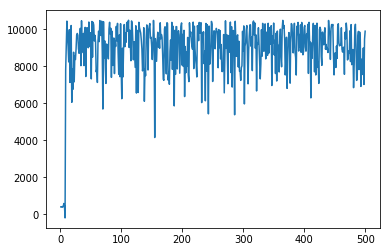

In [27]:
## TODO: Plot the rewards.

import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(results['num_episode'], results['final_reward'])
_ = plt.ylim()

## Reflections

**Question 1**: Describe the task that you specified in `task.py`.  How did you design the reward function?

**Answer**:

The specified task is "take off" task, where the quadcopter takes off in vertical or z direction towards the target position. Initial position of the quadcopter is 0,0,10 and target is 0,0,100. 
Reward functions is designed as follows:

reward = abs(z) - abs(x) - abs(y) - penalty + rewd

where 

      z is the z coordinate or position of the quadcopter
      x is the x coordinate or position of the quadcopter 
      y is the y coordinate or position of the quadcopter 
      penalty is 20% above target position
      rewd is 20% range around the target position

Reward of z is added for continous flying towards the target of 100. Reward funtion is penalized for deviation from x and y
direction. Reward funtion is also penalized for flying 20% above the target of 100. Extra reward is given for flying near
the target within 20% range.
After several modifications to the Reward function decided to keep it simple. As making the reward function too complex ends up in memorizing instead of the agent learning by itself.

**Question 2**: Discuss your agent briefly, using the following questions as a guide:

- What learning algorithm(s) did you try? What worked best for you?
- What was your final choice of hyperparameters (such as $\alpha$, $\gamma$, $\epsilon$, etc.)?
- What neural network architecture did you use (if any)? Specify layers, sizes, activation functions, etc.

**Answer**:

I have used DDPG algorithm, an actor and critic method which uses deterministic policy function but adds some external noise to produce stochasticity in actions taken.  The 2 main components used are the actor and critic networks which are designed using deep networks.

Actor model is meant for mapping states to actions. For actor I have used Neural Network with 3 hidden layers of sizes 32-64-32 nodes with activation function of 'relu'. Final layer is added with sigmoid activation funtion. Loss function is defined using (Q values) action value gradient. Also I have used Adam as optimizer

Critic model is used for mapping (state,action) pairs to their Q-values. For critic I have used 2 mini sub-networks, first path is for states and second one is for action. For both the paths, I have used Neural Network with 2 hidden layers with 32-64 nodes with activation function as 'relu'. Later these paths are combined and a final layer with relu activation function is added. 

Hyperparameters used for this algorithm are as follows:
mu = , theta = 0.15, sigma = 0.2, gamma = 0.99, tau = 0.01

A replay buffer is used for the algorithm to learn from past experiences for storing and recalling experience tuples. 

We use Ornstein–Uhlenbeck process to add some random sample of noise from a gaussian distribution to our actions for exploratory behaviour.

**Question 3**: Using the episode rewards plot, discuss how the agent learned over time.

- Was it an easy task to learn or hard?
- Was there a gradual learning curve, or an aha moment?
- How good was the final performance of the agent? (e.g. mean rewards over the last 10 episodes)

**Answer**:

Overall it was a difficult task for the agent to learn. I have chossed the task of 'take-off'. There was a gradual learning curve with repeated number of iterations/episodes. Earlier during the learning, it didn't fly, later most of the time quadcopter crashes to ground after flying for some time. Initially it was difficult task to do but later after several modifications to the reward structure, quadcopter was able to perform better. It still goes above the target or fly short of it but is ok if it constantly fly near or around the target position. This can be seen from the quadcopter position from above episodes. Also we can observe from the rewards plot that we are constantly maximizing rewards.
It can be seen by the final perfomance of agent that quadcopter does'nt deviate much from x and y directions and continously fly near our target position.

**Question 4**: Briefly summarize your experience working on this project. You can use the following prompts for ideas.

- What was the hardest part of the project? (e.g. getting started, plotting, specifying the task, etc.)
- Did you find anything interesting in how the quadcopter or your agent behaved?

**Answer**:

The hardest part of the project was to design the reward function. Finding the correct reward function suitable for the task took lot of experimentation and training. Second hardest part was to train the agent as it keeps forgeting and we have to repeat the task for several episodes for the agent to learn.

It was interesting to see that finally the agent learns to fly near the target position even after crashing during the training periods and again reaching the target position thus learning from past experiences.
It was really interesting to see how the agent gradually learned the task over a period of time. Just by setting the target position, agent itself discovers the best way to do the task or achieve target position by maximizing reward function.
My experience of working on this project was very good even though it was really difficult and time consuming. It gave me the knowledge and experience on designing an RL agent and it's reward function in real time to perform task.